In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(291, 240)

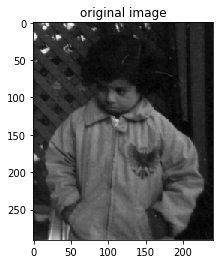

In [3]:
img = mpimg.imread('pout.tif')
#img = np.uint8(mpimg.imread('moon.png')*255)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
img.shape

## <font color='red'>1. Write code to calculate histogram (probability mass function (PMF)) for uint8 image.i.e. pixel value 0 to 255. </font> 

In [14]:
def imhist(im):
    m, n = im.shape
    h = np.zeros(shape=(256))
    bins = np.linspace(0, 255, 256)
    freq = np.zeros(256)
    for i in range(m):
        for j in range(n):
            freq[im[i][j]] += 1
    h = freq/(m*n)
    return h

Text(0.5, 1.0, 'Original histogram')

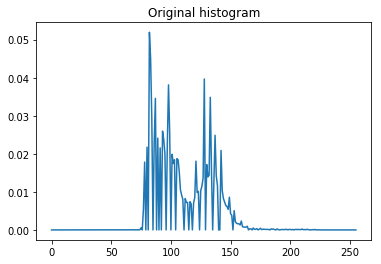

In [15]:
h=imhist(img)
plt.plot(h)
plt.title('Original histogram')

## <font color='red'>2. Write code to find CDF (cumulative sum) for histogram of image. </font> 

In [16]:
def CDF(h):
    c = np.zeros_like(h)
    c[0] = h[0]
    for i in range(len(h) - 1):
        c[i+1] = c[i] + h[i-1]
    return c

Text(0.5, 1.0, 'Original image CDF')

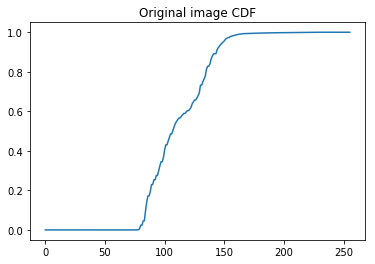

In [17]:
c=CDF(h)
plt.plot(c)
plt.title('Original image CDF')

# Histogram Equalization: 
Histogram equalization is used to enhance contrast. It is not necessary that contrast will always be increase in this. There may be some cases were histogram equalization can be worse. In that cases the contrast is decreased. Histogram equalization involves transforming the intensity values so that the histogram of the output image approximately matches a uniform histogram.

Let $L$ be the intensity levels in the image, $r$ be the pixel value of the image and $s=T(r)$ be the transformed pixel value, then the transformation required to achieve histogram equalization is $$s=T(r)=floor\left[(L-1)\int_{0}^{r}P_{r}(w)dw\right]$$ Where, $P_r(r)$ is the PMF of the image. 
## <font color='red'>3. Write code for histogram equalization. </font> 

In [18]:
def histeq(im):
    
    cdf = np.array(CDF(h)) #cumulative distribution function
    L = 255
    sk = np.floor((L-1)*cdf)
    s1, s2 = im.shape
    Y = np.zeros_like(im)
    m, n = im.shape
    for i in range(m):
        for j in range(n):
            Y[i][j] = sk[im[i][j]]
    return Y 

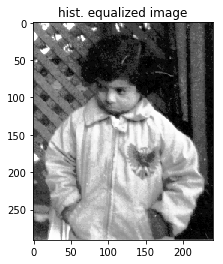

In [19]:
nimg = histeq(img)
plt.imshow(nimg)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

Text(0.5, 1.0, 'Equalized histogram')

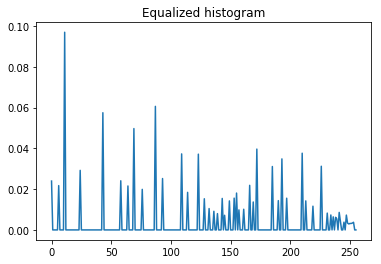

In [20]:
nh=imhist(nimg)
plt.plot(nh)
plt.title('Equalized histogram')

Text(0.5, 1.0, 'New image CDF')

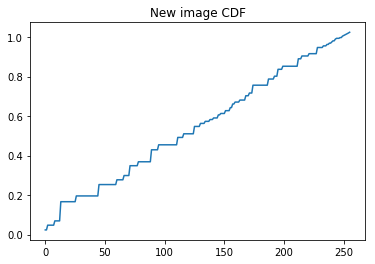

In [21]:
nc=CDF(nh)
plt.plot(nc)
plt.title('New image CDF')

# Final Results

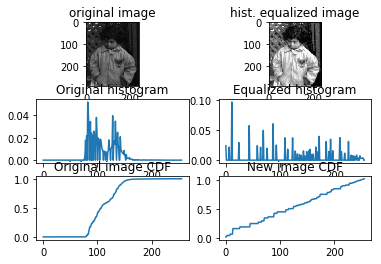

In [22]:
plt.subplot(321)
plt.imshow(img)
plt.set_cmap('gray')
plt.title('original image')
plt.subplot(322)
plt.imshow(nimg)
plt.set_cmap('gray')
plt.title('hist. equalized image')
plt.subplot(323)
plt.plot(h)
plt.title('Original histogram')
plt.subplot(324)
plt.plot(nh)
plt.title('Equalized histogram')
plt.subplot(325)
plt.plot(c)
plt.title('Original image CDF')
plt.subplot(326)
plt.plot(nc)
plt.title('New image CDF')
plt.show()